# Assignment 2

Due EOD Thursday Oct 2nd

## Question 1

A nuclear fuel pellet is a cylinder, 1.5 cm in lenth and 1 cm in diameter. Assume the surface temperature is 300 C everywhere. Given temperature probe data below, determine the radial temperature profile in the middle of a nuclear fuel pellet (i.e.: T(r, z = 0.75)) using radial basis functions.


In [ ]:
import numpy as np

# 20 data points presented in columns: | x | y | z | T |, measurements in cm

data = np.array([
    [5.1690e-02, 2.3766e-01, 6.7059e-01, 5.2645e+02],
    [1.1353e-01, 9.4708e-02, 5.3856e-01, 5.5201e+02],
    [1.6676e-01, 1.4358e-01, 4.6936e-01, 5.0802e+02],
    [1.3610e-01, 3.7207e-02, 2.1694e-01, 4.3663e+02],
    [8.9225e-02, 3.7293e-01, 1.1270e+00, 3.9234e+02],
    [1.9001e-01, 3.7240e-01, 8.4774e-01, 3.8872e+02],
    [5.4849e-02, 3.5425e-01, 5.7478e-01, 4.3784e+02],
    [1.7001e-01, 2.0241e-01, 1.2960e+00, 4.0159e+02],
    [2.0606e-01, 3.1594e-01, 6.4077e-01, 4.2652e+02],
    [2.5382e-01, 2.5859e-01, 4.8610e-01, 4.2481e+02],
    [5.6038e-02, 8.2231e-02, 4.2029e-01, 5.3244e+02],
    [3.1242e-01, 8.0489e-02, 1.1530e+00, 4.2453e+02],
    [6.0186e-02, 4.4891e-01, 3.9941e-01, 3.4207e+02],
    [1.5070e-01, 3.4794e-01, 1.5595e-01, 3.4750e+02],
    [1.8215e-01, 3.4388e-01, 1.0478e+00, 3.9963e+02],
    [1.1633e-01, 4.1011e-01, 5.5001e-01, 3.7611e+02],
    [1.2377e-01, 3.3703e-01, 3.7672e-02, 3.1423e+02],
    [4.6378e-02, 3.3653e-01, 1.4434e+00, 3.2345e+02],
    [2.9063e-02, 3.2584e-02, 2.3977e-01, 4.5993e+02],
    [2.1162e-02, 3.8590e-01, 2.5905e-01, 3.6901e+02]
])

Consider what you know about this system. What extra information do you have in terms of

### a) type(s) of symmetry?

{answer}

a) Based on the description of the nuclear fuel pellet as a cylinder, the system exhibits axial and radial symmetry.

### b) Boundary conditions?

{answer}

b) The boundary condition is that the surface temperature of the nuclear fuel pellet is 300 C everywhere. This means that at any point on the surface of the cylinder (where r = 0.5 cm or z = 0 or z = 1.5 cm), the temperature T is 300 C.

## c) Plot the best guess of the radial temperature profile

Note: RBFs will fail with a linear solver error if two data points exactly overlap.

{Method, implementation, answer, answer}

In [5]:
# Extract data points near the middle of the pellet (z = 0.75 cm)
# We'll use a tolerance to consider points "near" z = 0.75 cm
tolerance = 0.1 # Define a suitable tolerance

mid_pellet_data = data[np.abs(data[:, 2] - 0.75) < tolerance]

print("Data points near the middle of the pellet:")
display(mid_pellet_data)

Data points near the middle of the pellet:


array([[5.1690e-02, 2.3766e-01, 6.7059e-01, 5.2645e+02],
       [1.9001e-01, 3.7240e-01, 8.4774e-01, 3.8872e+02]])

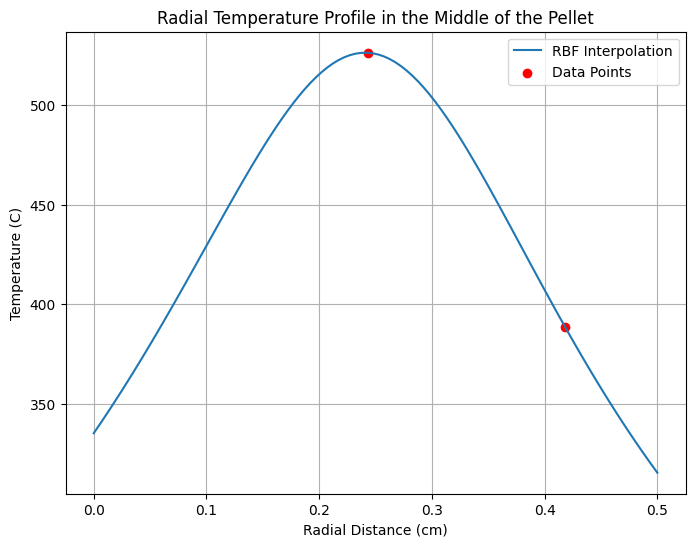

In [9]:
import matplotlib.pyplot as plt

# Calculate the interpolated temperatures at the plotting points
# Calculate the distance matrix between the plotting points and the original data points
distance_matrix_plot = cdist(plot_radial_distances.reshape(-1, 1), radial_distances.reshape(-1, 1), metric='euclidean')

# Calculate the RBF values for the plotting points
rbf_values_plot = inverse_multiquadric(distance_matrix_plot, epsilon)

# Calculate the interpolated temperatures
interpolated_temperatures = rbf_values_plot.dot(weights)

# Plot the radial temperature profile
plt.figure(figsize=(8, 6))
plt.plot(plot_radial_distances, interpolated_temperatures, label='RBF Interpolation')
plt.scatter(radial_distances, temperatures, color='red', label='Data Points')
plt.xlabel('Radial Distance (cm)')
plt.ylabel('Temperature (C)')
plt.title('Radial Temperature Profile in the Middle of the Pellet')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Generate points for plotting the radial temperature profile
# The radius of the pellet is 0.5 cm
plot_radial_distances = np.linspace(0, 0.5, 100) # Generate 100 points from the center to the edge

In [7]:
from scipy.spatial.distance import cdist

# Define the inverse multiquadric RBF
def inverse_multiquadric(r, epsilon):
    return 1.0 / np.sqrt(1.0 + (epsilon * r)**2)

# Choose an epsilon parameter (this may need tuning)
epsilon = 5.0

# Calculate the distance matrix between the radial distances
distance_matrix = cdist(radial_distances.reshape(-1, 1), radial_distances.reshape(-1, 1), metric='euclidean')

# Calculate the RBF matrix
rbf_matrix = inverse_multiquadric(distance_matrix, epsilon)

# Solve for the weights
weights = np.linalg.solve(rbf_matrix, temperatures)

print("RBF weights:")
display(weights)

RBF weights:


array([539.68125116, -17.57505557])

In [6]:
# Calculate the radial distance from the center (0,0) for the mid-pellet data
# The center of the pellet is assumed to be at (0, 0) in the x-y plane.
radial_distances = np.sqrt(mid_pellet_data[:, 0]**2 + mid_pellet_data[:, 1]**2)

# Extract the temperatures for the mid-pellet data
temperatures = mid_pellet_data[:, 3]

print("Radial distances and corresponding temperatures:")
display(np.column_stack((radial_distances, temperatures)))

Radial distances and corresponding temperatures:


array([[2.43216224e-01, 5.26450000e+02],
       [4.18073630e-01, 3.88720000e+02]])

# Question 2

You run an experiment and obtain the following data:

| x | y1 | y2 | y3 | y4 | y5 |
|---|---|---|---| --- | --- |
| 0.00 | -29.49 | -2.14 | 15.88 | 22.69 | 28.53 |
| 1.11 | 2.83 | 18.02 | -25.45 | -32.45 | 7.50 |
| 2.22 | 1.97 | -10.49 | -0.18 | -32.10 | -40.31 |
| 3.33 | -38.09 | -46.16 | -7.87 | -33.97 | -38.39 |
| 4.44 | -3.97 | -32.22 | -33.95 | -11.07 | -32.47 |
| 5.56 | 4.45 | -10.88 | 20.43 | 6.57 | -8.49 |
| 6.67 | 50.22 | 51.29 | 80.02 | 66.15 | 84.90 |
| 7.78 | 164.11 | 190.26 | 160.94 | 182.35 | 163.18 |
| 8.89 | 331.75 | 306.51 | 278.40 | 302.13 | 335.44 |
| 10.00 | 517.06 | 483.20 | 476.73 | 512.16 | 500.64 |



In [ ]:
import numpy as np

# Define the table as a list of lists
d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])

## a) Determine the best cubic polynomial fit to this data with the uncertainty

{method, implementation, answer}

In [32]:
# Separate the x and y values
x_data = d[:, 0]
y_data = d[:, 1:] # Select all columns from the second one onwards

# Calculate the mean of the y-values for each x
y_mean = np.mean(y_data, axis=1)

# Perform cubic polynomial fit (degree=3)
coefficients = np.polyfit(x_data, y_mean, 3)

# Create a polynomial function from the coefficients
cubic_polynomial = np.poly1d(coefficients)

# Calculate the predicted y-values using the fitted polynomial
y_predicted = cubic_polynomial(x_data)

# Calculate the residuals (difference between observed mean y and predicted y)
residuals = y_mean - y_predicted

# Calculate the standard deviation of the residuals as an estimate of the uncertainty
uncertainty = np.std(residuals)

print("Cubic polynomial coefficients (p[0]*x^3 + p[1]*x^2 + p[2]*x + p[3]):")
display(coefficients)

print(f"\nEstimated uncertainty of the cubic polynomial fit (standard deviation of residuals): {uncertainty:.4f}")

Cubic polynomial coefficients (p[0]*x^3 + p[1]*x^2 + p[2]*x + p[3]):


array([  0.8814571 ,  -2.5883747 , -13.09160479,   9.52582656])


Estimated uncertainty of the cubic polynomial fit (standard deviation of residuals): 3.8752


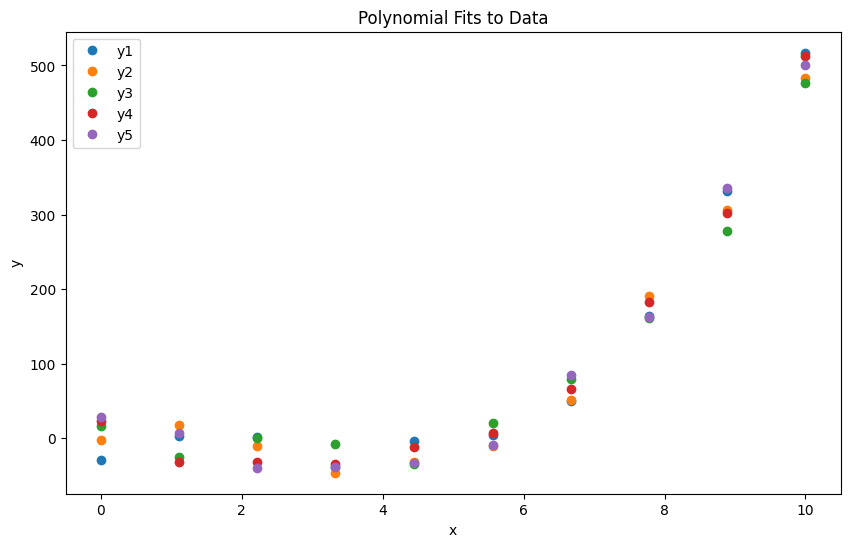

In [22]:
import matplotlib.pyplot as plt

# Create a figure and axes for the plot
plt.figure(figsize=(10, 6))

# Iterate through each column of y_data and plot
for i in range(y_data.shape[1]):
    plt.plot(x_data, y_data[:, i], marker='o', linestyle='', label=f'y{i+1}')

# Add an x-axis label
plt.xlabel('x')

# Add a y-axis label
plt.ylabel('y')

# Add a title to the plot
plt.title('Polynomial Fits to Data')

# Add a legend to the plot
plt.legend()

# Display the plot (we'll add the fits in subsequent steps)
plt.show()

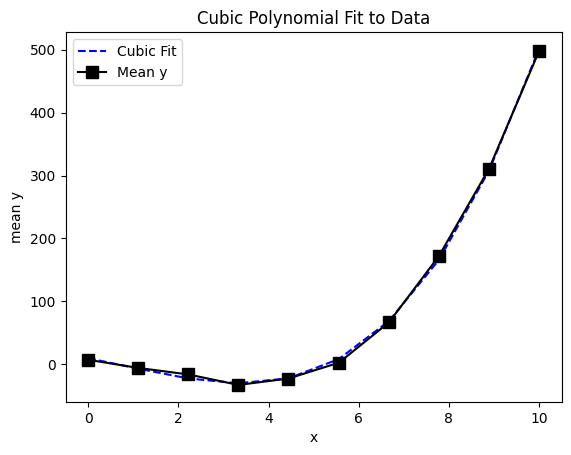

In [31]:
# Add the cubic fit to the plot
plt.plot(x_data, y_predicted, linestyle='--', color='blue', label='Cubic Fit')
# Add the mean y-values to the plot
plt.plot(x_data, y_mean, marker='s', linestyle='-', color='black', markersize=8, label='Mean y')


# Update the legend to include the new plots
plt.legend()
plt.title('Cubic Polynomial Fit to Data')
plt.ylabel('mean y')
plt.xlabel('x')

# Show the plot
plt.show()

## b) Your manager thinks this should be a quadratic. Which do you think it should be and why?

{Answer}

In [15]:
# Perform quadratic polynomial fit (degree=2)
coefficients_quadratic = np.polyfit(x_data, y_mean, 2)

# Create a polynomial function from the quadratic coefficients
quadratic_polynomial = np.poly1d(coefficients_quadratic)

# Calculate the predicted y-values using the fitted quadratic polynomial
y_predicted_quadratic = quadratic_polynomial(x_data)

# Calculate the residuals for the quadratic fit
residuals_quadratic = y_mean - y_predicted_quadratic

# Calculate the standard deviation of the quadratic residuals as an estimate of the uncertainty
uncertainty_quadratic = np.std(residuals_quadratic)

print(f"Estimated uncertainty of the quadratic polynomial fit (standard deviation of residuals): {uncertainty_quadratic:.4f}")

# Compare the uncertainties
print(f"\nUncertainty of cubic fit: {uncertainty:.4f}")
print(f"Uncertainty of quadratic fit: {uncertainty_quadratic:.4f}")

Estimated uncertainty of the quadratic polynomial fit (standard deviation of residuals): 21.6075

Uncertainty of cubic fit: 3.8752
Uncertainty of quadratic fit: 21.6075


Based on the calculated uncertainties, we can compare the two fits.

The estimated uncertainty for the cubic polynomial fit is approximately **3.8752**.
The estimated uncertainty for the quadratic polynomial fit is approximately **21.6075**.

Since the uncertainty of the cubic fit is significantly lower than that of the quadratic fit, the cubic polynomial provides a much better fit to the data. This suggests that a cubic model is more appropriate for describing the relationship between x and the mean y-values in this experiment.

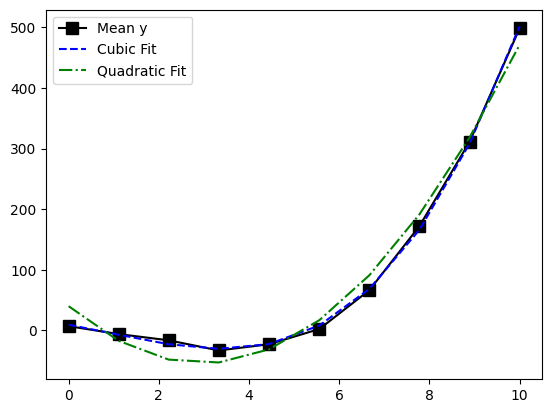

In [17]:
# Add the mean y-values to the plot
plt.plot(x_data, y_mean, marker='s', linestyle='-', color='black', markersize=8, label='Mean y')

# Add the cubic fit to the plot
plt.plot(x_data, y_predicted, linestyle='--', color='blue', label='Cubic Fit')

# Add the quadratic fit to the plot
plt.plot(x_data, y_predicted_quadratic, linestyle='-.', color='green', label='Quadratic Fit')

# Update the legend to include the new plots
plt.legend()

# Show the plot
plt.show()

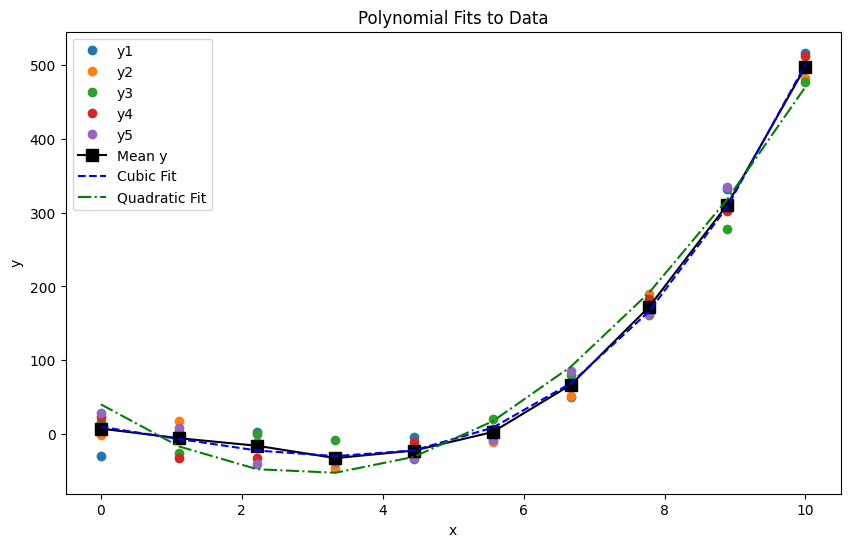

In [20]:
import matplotlib.pyplot as plt

# Create a figure and axes for the plot
plt.figure(figsize=(10, 6))

# Iterate through each column of y_data and plot
for i in range(y_data.shape[1]):
    plt.plot(x_data, y_data[:, i], marker='o', linestyle='', label=f'y{i+1}')

# Add the mean y-values to the plot
plt.plot(x_data, y_mean, marker='s', linestyle='-', color='black', markersize=8, label='Mean y')

# Add the cubic fit to the plot
plt.plot(x_data, y_predicted, linestyle='--', color='blue', label='Cubic Fit')

# Add the quadratic fit to the plot
plt.plot(x_data, y_predicted_quadratic, linestyle='-.', color='green', label='Quadratic Fit')

# Add an x-axis label
plt.xlabel('x')

# Add a y-axis label
plt.ylabel('y')

# Add a title to the plot
plt.title('Polynomial Fits to Data')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()